<a href="https://colab.research.google.com/github/harisapn/TensorFlow-deep-learning/blob/main/01_neuralnetwork_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating data to view and fit

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-10-24 08:02:05.715424


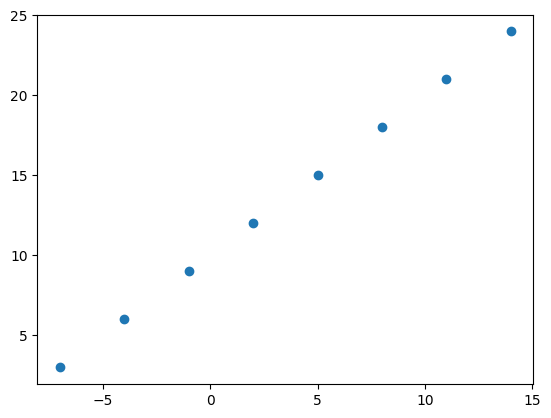

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

#Regression input and output shapes


In [ ]:
 #Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:

house_info.shape


TensorShape([3])

In [ ]:
 #Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

((), ())

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(-7.0, 3.0)

#Steps in modelling with tensorflow

In [ ]:
#Set a random seed
tf.random.set_seed(42)

#create a model using sequential APi
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model
model.compile(loss=tf.keras.losses.mae, #mean apsolute error
              optimizer=tf.keras.optimizers.SGD(),#stochastic gradient descent
              metrics=["mae"])

#fit the model
 #model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 862ms/step - loss: 8.8250 - mae: 8.8250
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 8.6925 - mae: 8.6925
Epoch 3/5
1/1 [==============================] - 0s 50ms/step - loss: 8.5600 - mae: 8.5600
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 8.4275 - mae: 8.4275
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 8.2950 - mae: 8.2950


In [ ]:
# Check out X and y
X, y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 140ms/step


array([[25.732187]], dtype=float32)

#Improving a model


In [ ]:
#Changing the number of epochs

# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train for 100 epochs not 10

Epoch 1/100
1/1 [==============================] - 1s 937ms/step - loss: 9.4371 - mae: 9.4371
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 9.3046 - mae: 9.3046
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 9.1721 - mae: 9.1721
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 9.0396 - mae: 9.0396
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 8.9071 - mae: 8.9071
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 8.7746 - mae: 8.7746
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6421 - mae: 8.6421
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 8.5096 - mae: 8.5096
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 8.3771 - mae: 8.3771
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 8.2446 - mae: 8.2446
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - l

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 129ms/step


array([[30.044123]], dtype=float32)

#Evaluating a model

In [ ]:
#make a bigger dataset
X=np.arange(-200,100,4)
X


array([-200, -196, -192, -188, -184, -180, -176, -172, -168, -164, -160,
       -156, -152, -148, -144, -140, -136, -132, -128, -124, -120, -116,
       -112, -108, -104, -100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,
        -68,  -64,  -60,  -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,
        -24,  -20,  -16,  -12,   -8,   -4,    0,    4,    8,   12,   16,
         20,   24,   28,   32,   36,   40,   44,   48,   52,   56,   60,
         64,   68,   72,   76,   80,   84,   88,   92,   96])

In [ ]:
#make labels y=x+10

y=np.arange(-190,110,4)
y

array([-190, -186, -182, -178, -174, -170, -166, -162, -158, -154, -150,
       -146, -142, -138, -134, -130, -126, -122, -118, -114, -110, -106,
       -102,  -98,  -94,  -90,  -86,  -82,  -78,  -74,  -70,  -66,  -62,
        -58,  -54,  -50,  -46,  -42,  -38,  -34,  -30,  -26,  -22,  -18,
        -14,  -10,   -6,   -2,    2,    6,   10,   14,   18,   22,   26,
         30,   34,   38,   42,   46,   50,   54,   58,   62,   66,   70,
         74,   78,   82,   86,   90,   94,   98,  102,  106])

##split data into test/training sets


In [ ]:
#Check how many samples do we have
len(X)

75

In [ ]:
len(y)

75

In [ ]:
#Spit data into train and test sets
X_train=X[:60] #first 60 elements
y_train=y[:60]

X_test=X[60:] # last 60 elements
y_test=y[60:]

len(X_train),len(X_test)

(60, 15)

##Visualizing the data

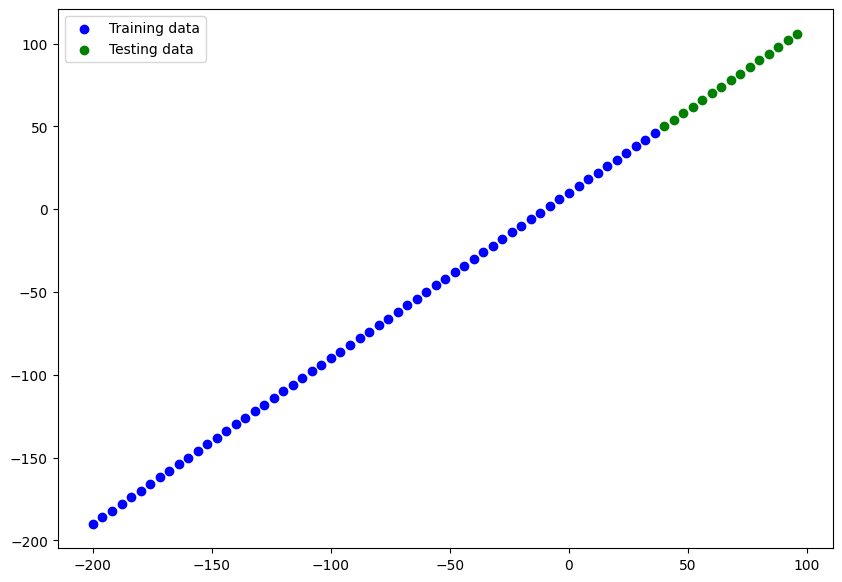

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label='Training data')
plt.scatter(X_test,y_test,c='g',label='Testing data')
plt.legend()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model
#model.fit(X_train, y_train, epochs=100) #

In [ ]:

# Doesn't work (model not fit/built)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

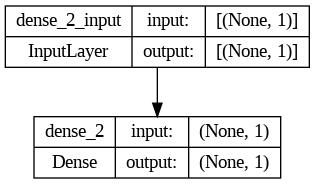

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing the predictions

In [ ]:
#Visualizing the predictions
y_preds=model.predict(X_test)
y_preds

1/1 [==============================] - 0s 93ms/step


array([[ 58.03556 ],
       [ 63.79689 ],
       [ 69.55822 ],
       [ 75.31956 ],
       [ 81.08089 ],
       [ 86.842224],
       [ 92.60355 ],
       [ 98.36488 ],
       [104.12622 ],
       [109.88755 ],
       [115.64889 ],
       [121.41022 ],
       [127.17155 ],
       [132.93288 ],
       [138.6942  ]], dtype=float32)

In [ ]:
y_test

array([ 50,  54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98,
       102, 106])

In [ ]:
#make a function for visualizing

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


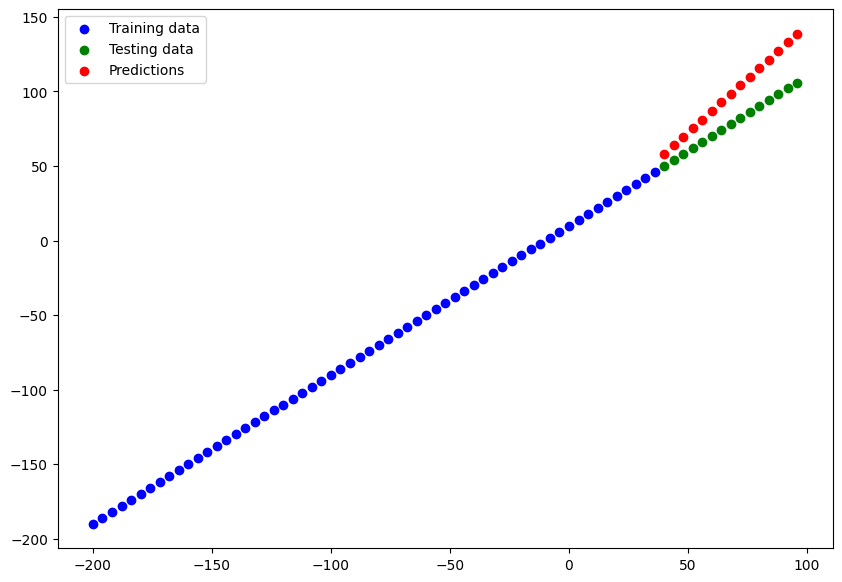

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics
MSE
MAE

In [ ]:
#Evaluate the model on the test set

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 465ms/step - loss: 20.3649 - mae: 20.3649


[20.364885330200195, 20.364885330200195]

In [ ]:
y_test=tf.constant(y_test)
#y-test and y_preds not same dimensions


In [ ]:
y_preds=tf.squeeze(y_preds)

In [ ]:
y_preds

<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([ 58.03556 ,  63.79689 ,  69.55822 ,  75.31956 ,  81.08089 ,
        86.842224,  92.60355 ,  98.36488 , 104.12622 , 109.88755 ,
       115.64889 , 121.41022 , 127.17155 , 132.93288 , 138.6942  ],
      dtype=float32)>

In [ ]:
#Calculate the mean apsolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.constant(y_preds))
mae


<tf.Tensor: shape=(), dtype=float32, numpy=20.364885>

In [ ]:
#Calcualte the mean square error
mse=tf.metrics.mean_squared_error(y_true=y_test,
                                 y_pred=y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=472.63797>

In [ ]:
def mae(y_test,y_pred):

  return tf.metrics.mean_absolute_error(y_test,y_pred=tf.squeeze(y_pred))

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred=tf.squeeze(y_pred))

###Running experiments to improve model


1.  Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2.   Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.



To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.

*   model_1 - same as original model, 1 layer, trained for 100 epochs.
*   model_2 - 2 layers, trained for 100 epochs.
* model_3 - 2 layers, trained for 500 epochs.  





In [ ]:
# build model 1

#set the random seed
tf.random.set_seed(42)


#create the model

model_1=tf.keras.Sequential([tf.keras.layers.Dense(1)])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
#compile the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 23ms/step - loss: 75.1316 - mae: 75.1316
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 33.9770 - mae: 33.9770
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 40.8434 - mae: 40.8434
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 49.0518 - mae: 49.0518
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 36.7581 - mae: 36.7581
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 36.6361 - mae: 36.6361
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 34.5729 - mae: 34.5729
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 44.6064 - mae: 44.6064
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 36.7143 - mae: 36.7143
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 42.0338 - mae: 42.0338
Epoch 11/100
2/2 [==============================]

1/1 [==============================] - 0s 161ms/step


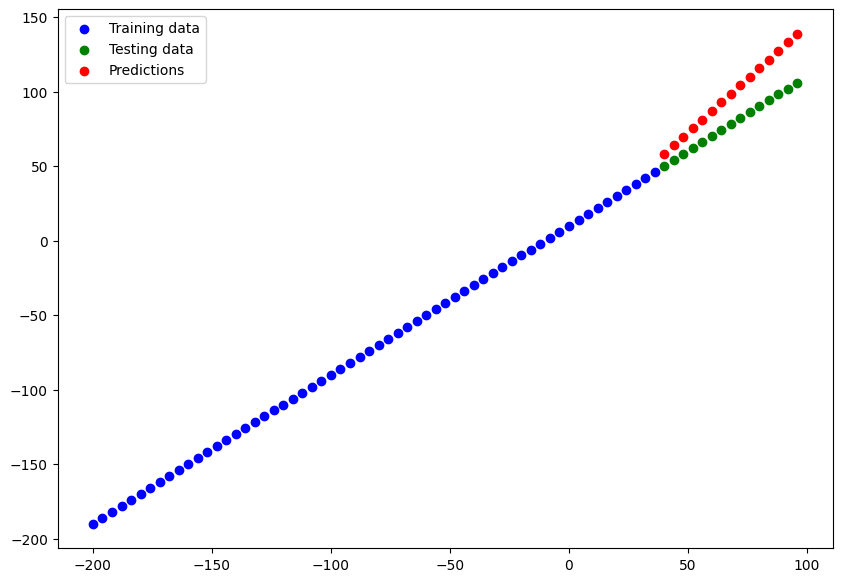

In [ ]:
#Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=20.39192>,
 <tf.Tensor: shape=(), dtype=float32, numpy=473.81335>)

In [ ]:
# build model_2, with 2 layers, 200 epochs

#set random sees
tf.random.set_seed(42)

#build a model

model_2=tf.keras.Sequential([tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)])

model_2.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,
                metrics=["mse"])

#fit the model

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


1/1 [==============================] - 0s 128ms/step


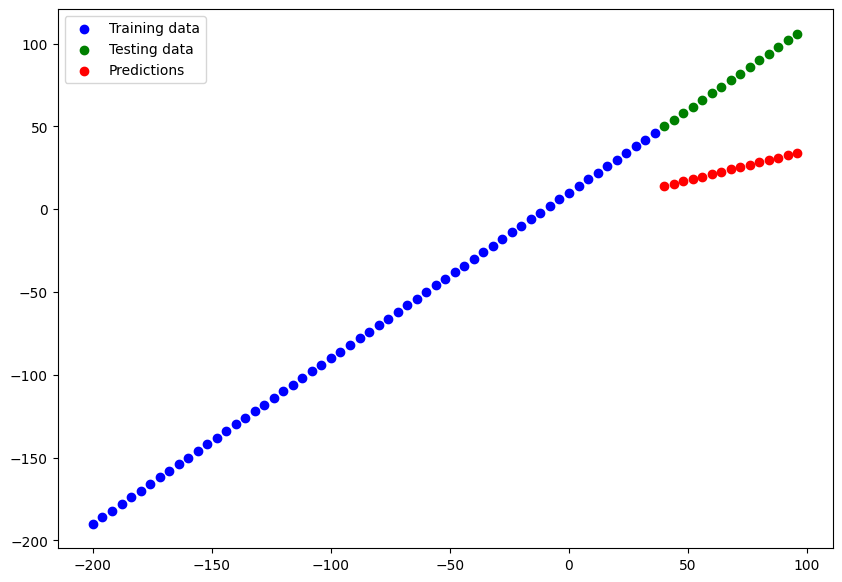

In [ ]:
#Make and plot predictions for model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(53.93638, 3031.5178)

In [ ]:
#Build model_3

#set random sees
tf.random.set_seed(42)

#build a model

model_3=tf.keras.Sequential([tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)])

model_3.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mae,
                metrics=["mse"])

#fit the model

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)


1/1 [==============================] - 0s 256ms/step


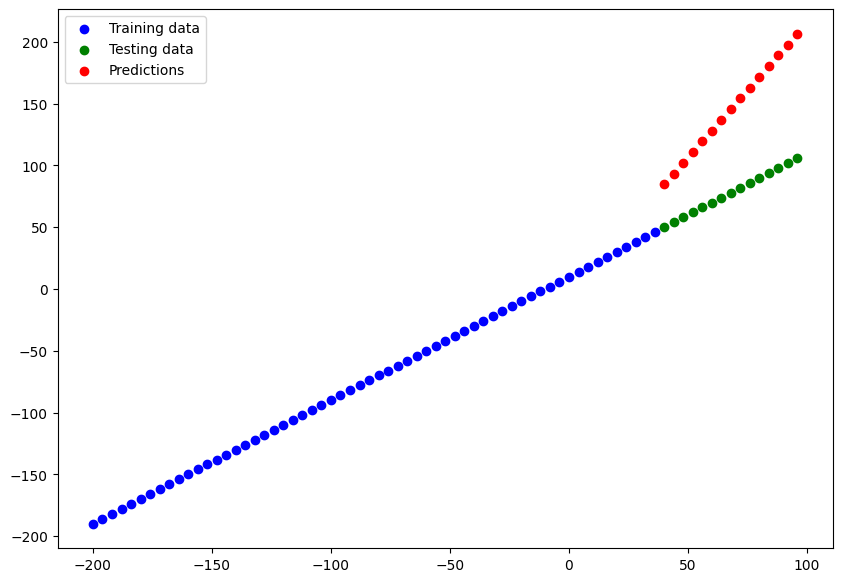

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.64595, 4988.3877)

###Comparing results

In [ ]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]
model_results


[['model_1', 20.39192, 473.81335],
 ['model_2', 53.93638, 3031.5178],
 ['model_3', 67.64595, 4988.3877]]

###Saving model

There are two ways to save a model in TensorFlow:

The SavedModel format (default).
The HDF5 format.
The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

In [ ]:
# Save a model using the SavedModel format
model_1.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [ ]:

# Save a model using the HDF5 format
model_1.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Loading a model

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_1 with the SavedModel version (should return True)
model_1_preds = model_1.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 [==============================] - 0s 72ms/step


True

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###Downloading a model (from Google Colab)

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#A larger example

REgression problem / More specifically we're going to try predict the cost of medical insurance for individuals based on a number of different parameters such as, age, sex, bmi, children, smoking_status and residential_region.

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We're going to have to turn the non-numerical columns into numbers (because a neural network can't handle non-numerical inputs).

To do so, we'll use the get_dummies() method in pandas.

It converts categorical variables (like the sex, smoker and region columns) into numerical variables using one-hot encoding.

In [ ]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted colum

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create X and y values

X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]
y.head()
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#Create train and test sets

from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
#Create th emodel
tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([tf.keras.layers.Dense(1),
                                     tf.keras.layers.Dense(2)])
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 9118.2891 - mae: 9118.2891
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7312.4971 - mae: 7312.4971
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7262.6855 - mae: 7262.6855
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7318.8950 - mae: 7318.8950
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7291.2129 - mae: 7291.2129
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7157.8418 - mae: 7157.8418
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7223.7598 - mae: 7223.7598
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7212.5415 - mae: 7212.5415
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7151.0532 - mae: 7151.0532
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7167.5532 - mae: 7167.5532

In [ ]:
#Evaluate the model

insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7767.8740 - mae: 7767.8740


[7767.8740234375, 7767.8740234375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

Increasing the number of layers (2 -> 3).

1.   Increasing the number of layers (2 -> 3).
2.   Increasing the number of units in each layer (except for the output layer).
3.   Changing the optimizer (from SGD to Adam)



In [ ]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([tf.keras.layers.Dense(100),
                                      tf.keras.layers.Dense(10),
                                      tf.keras.layers.Dense(1)])

#Compile the model

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=1e-7),
                          metrics=["mae"])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, Y_train, epochs=100, verbose=0)







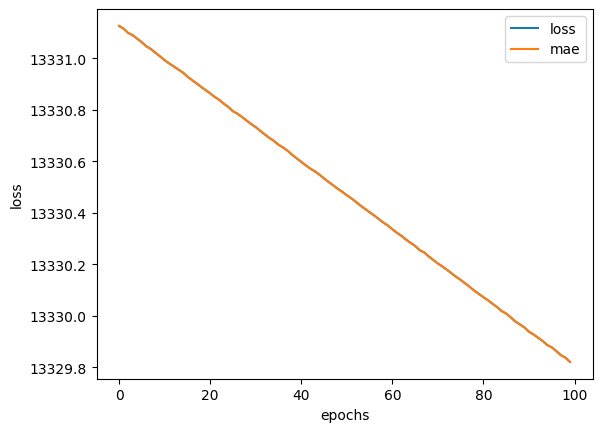

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [ ]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, Y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(x_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 12950.9736 - mae: 12950.9736


(12950.9736328125, 12950.9736328125)

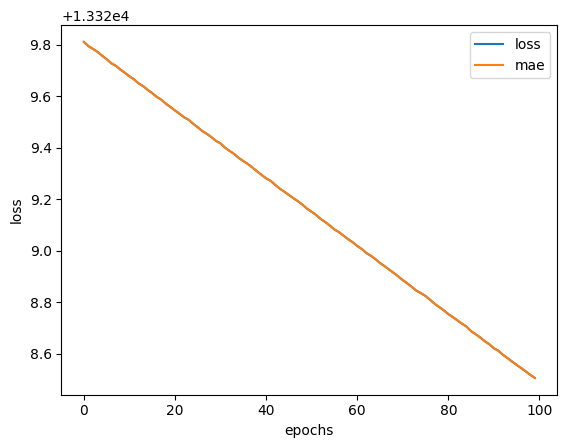

In [ ]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

###Preprocessing data (normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
# Check out the data
insurance.head()

Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
OneHotEncoder - one hot encode the non-numerical columns.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape


((1070, 11), (1070, 6))

In [ ]:
#Create th emodel
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([tf.keras.layers.Dense(1),
                                     tf.keras.layers.Dense(2)])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

insurance_model_3.fit(X_train_normal,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13346.0186 - mae: 13346.0186
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.8438 - mae: 13345.8438
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.6709 - mae: 13345.6709
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.5010 - mae: 13345.5010
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.3291 - mae: 13345.3291
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.1562 - mae: 13345.1562
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.9834 - mae: 13344.9834
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.8076 - mae: 13344.8076
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.6211 - mae: 13344.6211
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.41

In [ ]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3168.8894 - mae: 3168.8894


In [ ]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(12950.9736328125, 3168.889404296875)

This is one of the main benefits of normalization: faster convergence time (a fancy way of saying, your model gets to better results faster).